In [173]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [174]:
# def imshow(path):
#     # image = cv2.imread(path)
#     modified = cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
#     # gray_image = cv2.cvtColor(modified,cv2.COLOR_RGB2GRAY)
#     return plt.imshow(modified)

def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

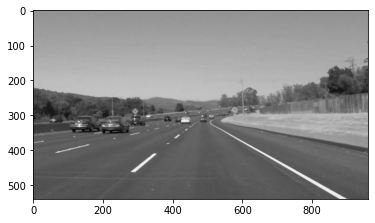

In [175]:
image = cv2.imread('./Images/solidWhiteCurve.jpg')
gray_image = cv2.imread('./Images/solidWhiteCurve.jpg',cv2.IMREAD_GRAYSCALE)
gray_image
plt.imshow(gray_image, cmap='gray')

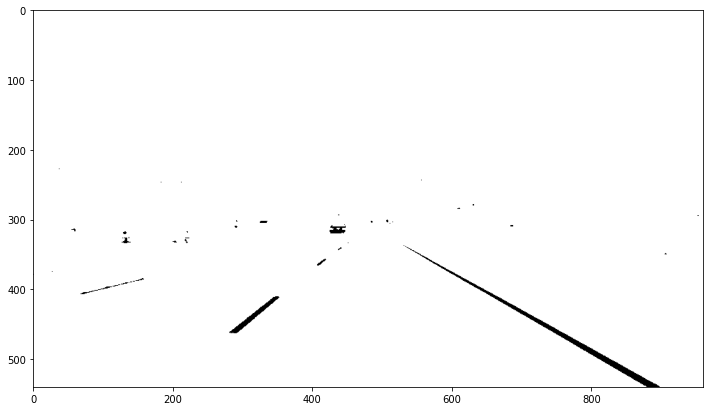

In [191]:
retval, dst = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY_INV)

imshow(dst)

In [192]:
# cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
# ret, threshold = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY_INV)
# imshow(threshold)

# dilation = cv2.dilate(threshold,cross,iterations=1)
# imshow(dilation)

In [178]:
# ret, otsu = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(otsu,cmap='gray')

In [193]:
contours, hierarchy = cv2.findContours(dst,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [194]:
len(contours)

1

In [195]:
contours

(array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),)

In [196]:
copy = image.copy()

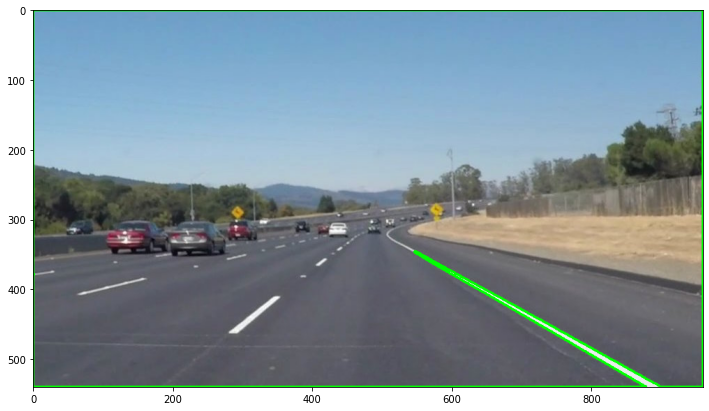

In [197]:
cv2.drawContours(copy,contours,-1,(0,255,0),2)
imshow(copy)

In [206]:
# sorted_contours = sorted(contours,key=cv2.contourArea, reverse=True)

In [205]:
# sorted_contours

In [204]:
# copy1 = image.copy()

In [203]:
# cv2.drawContours(copy1,sorted_contours[0],-1,(0,255,0),2)
# imshow(copy1)